<a href="https://colab.research.google.com/github/ritwiks9635/CNN_Project_File/blob/main/Bone_Age_Predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bone Age Prediction**🦴☠🦴☠🦴☠🦴☠🦴☠

In [ ]:
! unzip /content/https:/www.kaggle.com/datasets/kmader/rsna-bone-age/rsna-bone-age.zip

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob
from skimage.io import imread
%matplotlib inline

In [7]:
file_path = "/content/boneage-training-dataset/boneage-training-dataset"
data_path = "/content/boneage-training-dataset.csv"

In [8]:
data = pd.read_csv(data_path)
data.head()

,id,boneage,male
0,1377,180,False
1,1378,12,False
2,1379,94,False
3,1380,120,True
4,1381,82,False


In [9]:
data["path"] = data["id"].map(lambda x : os.path.join(file_path, '{}.png'.format(x)))

In [10]:
data.path[0]

'/content/boneage-training-dataset/boneage-training-dataset/1377.png'

In [11]:
data["exists"] = data["path"].map(os.path.exists)
print(data['exists'].sum(), 'images found of', data.shape[0], 'total')

12611 images found of 12611 total


In [12]:
data.head()

,id,boneage,male,path,exists
0,1377,180,False,/content/boneage-training-dataset/boneage-trai...,True
1,1378,12,False,/content/boneage-training-dataset/boneage-trai...,True
2,1379,94,False,/content/boneage-training-dataset/boneage-trai...,True
3,1380,120,True,/content/boneage-training-dataset/boneage-trai...,True
4,1381,82,False,/content/boneage-training-dataset/boneage-trai...,True


In [13]:
data['gender'] = data['male'].map(lambda x: 'male' if x else 'female')

In [14]:
boneage_mean = data['boneage'].mean()
boneage_div = 2*data['boneage'].std()

boneage_mean = 0
boneage_div = 1.0
data['boneage_zscore'] = data['boneage'].map(lambda x: (x-boneage_mean)/boneage_div)

In [15]:
data.dropna(inplace=True)
data.head()

,id,boneage,male,path,exists,gender,boneage_zscore
0,1377,180,False,/content/boneage-training-dataset/boneage-trai...,True,female,180.0
1,1378,12,False,/content/boneage-training-dataset/boneage-trai...,True,female,12.0
2,1379,94,False,/content/boneage-training-dataset/boneage-trai...,True,female,94.0
3,1380,120,True,/content/boneage-training-dataset/boneage-trai...,True,male,120.0
4,1381,82,False,/content/boneage-training-dataset/boneage-trai...,True,female,82.0


In [16]:
data.sample(3)

,id,boneage,male,path,exists,gender,boneage_zscore
6384,8654,132,False,/content/boneage-training-dataset/boneage-trai...,True,female,132.0
11142,13977,150,True,/content/boneage-training-dataset/boneage-trai...,True,male,150.0
6285,8544,94,False,/content/boneage-training-dataset/boneage-trai...,True,female,94.0


In [17]:
data[data.id == 6786]

,id,boneage,male,path,exists,gender,boneage_zscore
4704,6786,168,True,/content/boneage-training-dataset/boneage-trai...,True,male,168.0


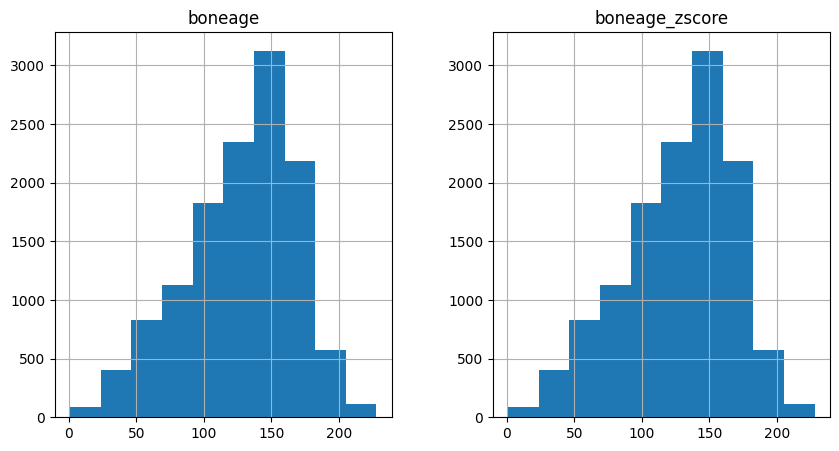

In [18]:
data[['boneage', 'male', 'boneage_zscore']].hist(figsize = (10, 5))
data['boneage_category'] = pd.cut(data['boneage'], 10)

In [19]:
data.head()

,id,boneage,male,path,exists,gender,boneage_zscore,boneage_category
0,1377,180,False,/content/boneage-training-dataset/boneage-trai...,True,female,180.0,"(159.9, 182.6]"
1,1378,12,False,/content/boneage-training-dataset/boneage-trai...,True,female,12.0,"(0.773, 23.7]"
2,1379,94,False,/content/boneage-training-dataset/boneage-trai...,True,female,94.0,"(91.8, 114.5]"
3,1380,120,True,/content/boneage-training-dataset/boneage-trai...,True,male,120.0,"(114.5, 137.2]"
4,1381,82,False,/content/boneage-training-dataset/boneage-trai...,True,female,82.0,"(69.1, 91.8]"


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_data, val_data = train_test_split(data, test_size=0.25, random_state = 2023, stratify = data['boneage_category'])
train_data.shape, val_data.shape

((9458, 8), (3153, 8))

In [22]:
train_data = train_data.groupby(['boneage_category', 'male']).apply(lambda x: x.sample(500, replace = True)).reset_index(drop = True)

In [23]:
train_data.head()

,id,boneage,male,path,exists,gender,boneage_zscore,boneage_category
0,10758,15,False,/content/boneage-training-dataset/boneage-trai...,True,female,15.0,"(0.773, 23.7]"
1,15104,18,False,/content/boneage-training-dataset/boneage-trai...,True,female,18.0,"(0.773, 23.7]"
2,10107,12,False,/content/boneage-training-dataset/boneage-trai...,True,female,12.0,"(0.773, 23.7]"
3,2312,18,False,/content/boneage-training-dataset/boneage-trai...,True,female,18.0,"(0.773, 23.7]"
4,3079,16,False,/content/boneage-training-dataset/boneage-trai...,True,female,16.0,"(0.773, 23.7]"


In [24]:
train_data.shape

(10000, 8)

In [25]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

In [26]:
img_size = (256, 256)

In [27]:
datagen = ImageDataGenerator(samplewise_center=False,                               samplewise_std_normalization=False,
                              horizontal_flip = True,
                              vertical_flip = False,
                              height_shift_range = 0.15,
                              width_shift_range = 0.15,
                              rotation_range = 5,
                              shear_range = 0.01,
                              fill_mode = 'nearest',
                              zoom_range=0.25,
                             preprocessing_function = preprocess_input)

In [28]:
train_generator = datagen.flow_from_dataframe(
    dataframe = train_data,
    x_col= 'path',
    y_col= 'boneage_zscore',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode= 'other',
    flip_vertical = True,
    color_mode = 'rgb',
    target_size = img_size)

Found 10000 validated image filenames.


In [29]:
val_generator = datagen.flow_from_dataframe(
    dataframe = val_data,
    x_col = 'path',
    y_col = 'boneage_zscore',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode = 'other',
    flip_vertical = True,
    color_mode = 'rgb',
    target_size = img_size)

Found 3153 validated image filenames.


In [30]:
test_X, test_Y = next(datagen.flow_from_dataframe(
                            val_data,

                            x_col = 'path',
                            y_col = 'boneage_zscore',
                            target_size = img_size,
                            batch_size = 512,
                            class_mode = 'other'
                            ))

Found 3153 validated image filenames.


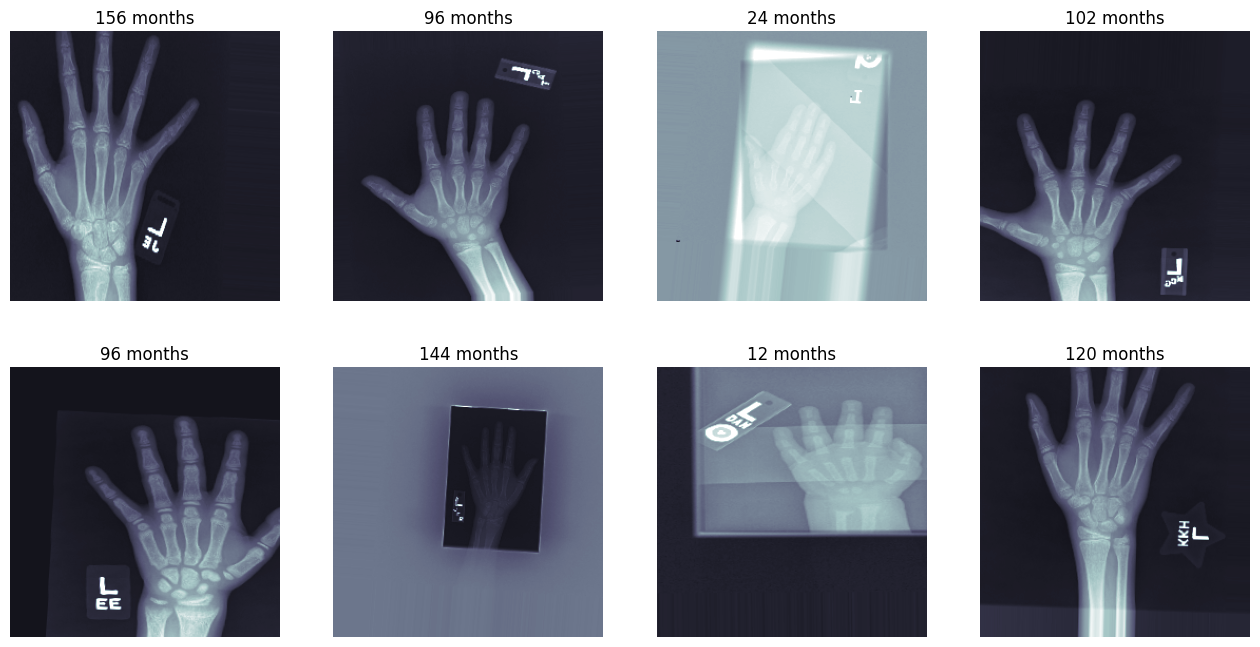

In [31]:
t_x, t_y = next(train_generator)
fig, m_axs = plt.subplots(2, 4, figsize = (16, 8))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = -127, vmax = 127)
    c_ax.set_title('%2.0f months' % (c_y*boneage_div+boneage_mean))
    c_ax.axis('off')

In [32]:
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense,Flatten
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras import Sequential

model_1 = tf.keras.applications.xception.Xception(input_shape = (256, 256, 3),
                                           include_top = False,
                                           weights = 'imagenet')
model_1.trainable = True
model_2 = Sequential()
model_2.add(model_1)
model_2.add(GlobalMaxPooling2D())
model_2.add(Flatten())
model_2.add(Dense(10, activation = 'relu'))
model_2.add(Dense(1, activation = 'linear'))

83683744/83683744 [==============================] - 3s 0us/step


In [33]:
from keras.metrics import mean_absolute_error
def mae_months(in_gt, in_pred):
    return mean_absolute_error(boneage_div*in_gt, boneage_div*in_pred)

In [34]:
model_2.compile(loss ='mse', optimizer= 'adam', metrics = [mae_months] )

In [35]:
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min', save_weights_only = True)


reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      patience=5) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [36]:
model_2.fit_generator(train_generator,
                                  validation_data = (test_X, test_Y),
                                  epochs = 15,
                                  callbacks = callbacks_list)

<ipython-input-36-e54013c62da3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_2.fit_generator(train_generator,


Epoch 1/15
313/313 [==============================] - ETA: 0s - loss: 708.3572 - mae_months: 18.0187
Epoch 1: val_loss improved from inf to 945.52863, saving model to best_model.h5
313/313 [==============================] - 553s 2s/step - loss: 708.3572 - mae_months: 18.0187 - val_loss: 945.5286 - val_mae_months: 26.3764 - lr: 0.0010
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 277.4674 - mae_months: 12.7299
Epoch 2: val_loss improved from 945.52863 to 633.70831, saving model to best_model.h5
313/313 [==============================] - 494s 2s/step - loss: 277.4674 - mae_months: 12.7299 - val_loss: 633.7083 - val_mae_months: 20.3787 - lr: 0.0010
Epoch 3/15
313/313 [==============================] - ETA: 0s - loss: 207.3669 - mae_months: 11.0493
Epoch 3: val_loss improved from 633.70831 to 224.77002, saving model to best_model.h5
313/313 [==============================] - 486s 2s/step - loss: 207.3669 - mae_months: 11.0493 - val_loss: 224.7700 - val_mae_months: 1

In [41]:
model_2.load_weights("best_model.h5")

In [42]:
pred_Y = boneage_div*model_2.predict(test_X, batch_size = 32, verbose = True)+boneage_mean
test_Y_months = boneage_div*test_Y+boneage_mean

16/16 [==============================] - 3s 167ms/step


Text(0, 0.5, 'Predicted Age (Months)')

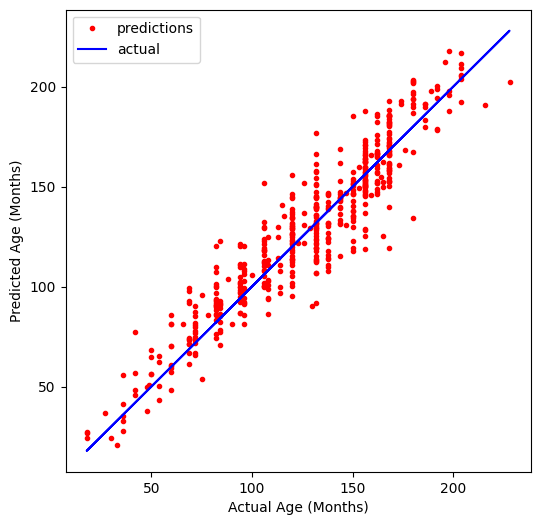

In [43]:
fig, ax1 = plt.subplots(1,1, figsize = (6,6))
ax1.plot(test_Y_months, pred_Y, 'r.', label = 'predictions')
ax1.plot(test_Y_months, test_Y_months, 'b-', label = 'actual')
ax1.legend()
ax1.set_xlabel('Actual Age (Months)')
ax1.set_ylabel('Predicted Age (Months)')

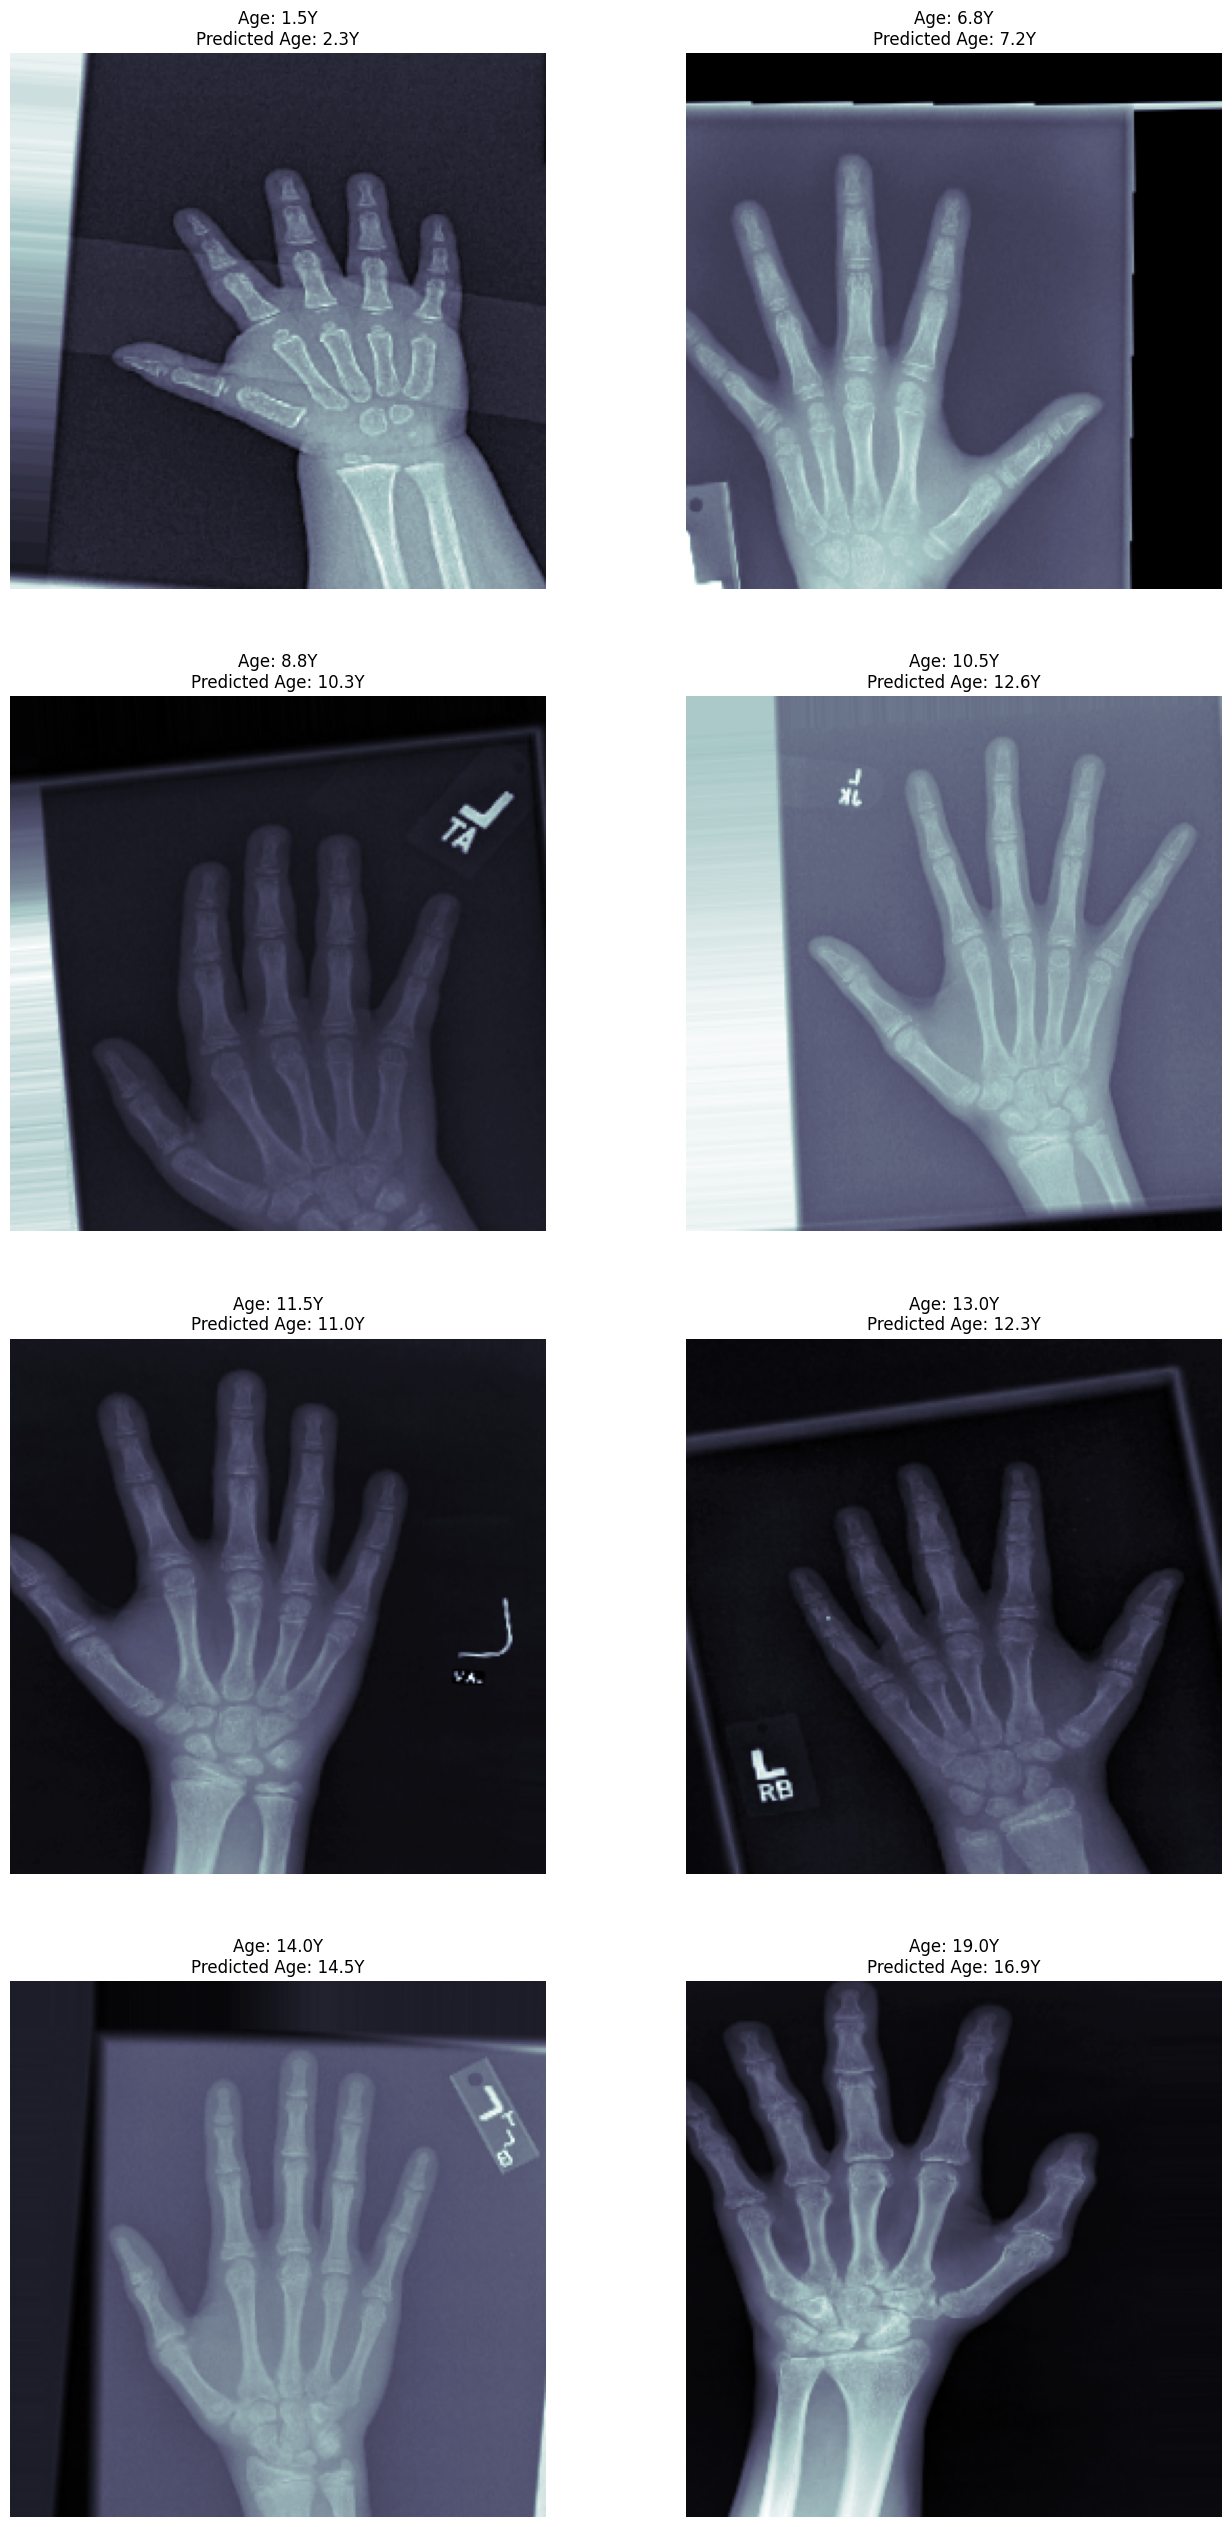

In [44]:
ord_idx = np.argsort(test_Y)
ord_idx = ord_idx[np.linspace(0, len(ord_idx)-1, 8).astype(int)] # take 8 evenly spaced ones
fig, m_axs = plt.subplots(4, 2, figsize = (16, 32))
for (idx, c_ax) in zip(ord_idx, m_axs.flatten()):
    c_ax.imshow(test_X[idx, :,:,0], cmap = 'bone')

    c_ax.set_title('Age: %2.1fY\nPredicted Age: %2.1fY' % (test_Y_months[idx]/12.0,
                                                           pred_Y[idx]/12.0))
    c_ax.axis('off')
fig.savefig('trained_img_predictions.png', dpi = 300)